# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The following observations were made by looking at the simulation and the code at environment.py:

The environment is made up of a grid of 8x6 intersections with 100 dummy agents circulating around.  Intersections and blocks alternate each other.  There is only one block in between intersections. Traffic lights change to red often when travelling North-South or East-West directions.  Vehicles travel one to two blocks, sometimes three, before stopping.  There is no yellow traffic light only green and red.  There are times in which a street is clear of traffic for several blocks and other times where the streets are busy with oncoming cars. Cars don't travel straight from end-to-end of the grid either NS or EW, turning right or left often.  All dummy agents obey traffic laws, US Right-of-Way rules and do not get into any violations or accidents.  The short blocks, quick changing traffic lights, and constantly moving traffic are environmental traits that help the Smartcab correct any wrong turn quickly by going to the right direction at the next intersection.  The fact that dummy agents obey traffic laws bring predictability to the environment which allows the Smartcab to learn a limited set of rules on how to move around safely and reliably within a reasonable number of trials.   

Over several trial simulations, the white color Smartcab does not move at all. It sits in front of a traffic light before an intersection while other vehicles move around the grid. The rewards that it receives are mainly negative because of inaction when it’s supposed to move and at times positive for being idle in front of a red light or not moving because of oncoming traffic. There are no other types of violations or accidents that it gets involved.  

There are two lines of text messages in the simulation.  The first message can be of green or red color and indicates if an action is taken and the received reward. The second line can be of green, yellow or red color and indicates two environment states (light and traffic), and if the agent is idle or followed the waypoint.  

The rewards that the driving agent receives are about whether it follows traffic laws and rules, and if it moves when the light is green. If the Smartcab stops at a red light, it receives a positive reward for every time step it's idle. This correct behavior is associated with a green color text message and a reward averaging around +2.10. When the traffic light turns to green and the Smartcab is idle because of oncoming traffic, it receives a yellow text message of a reward averaging around +1.27 for every time step there is oncoming traffic. Once the road is clear of oncoming traffic and the Smartcab is supposed to move but doesn't, it receives a negative reward for every time unit it's idle. The text message shown is of red color and the reward averages -5.0.

The largest reward amount is negative when the traffic light is green and the Smartcab doesn't move. The second largest reward is positive when it complies with red traffic lights. The third largest reward is positive when it's idle at oncoming traffic while the light is green. The size of the rewards incentivizes safety little by little and disincentivizes idleness as a way to accomplish reliability.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

The “Create the Driving Agent” call {env.create_agent(LearningAgent, learning=False, epsilon=1, alpha=0.5)} in the run() function has three flags that can be set: ‘learning’, ‘epsilon’ and ‘alpha’.

* The 'learning' flag is a True/False switch used in training trials. When set to False the driving agent moves around randomly without regard to any rules of the road, doesn’t learn from its actions or stop wandering around the grid.  If set to True, it drives randomly at the beginning then decreases gradually this behavior as it learns the right way to operate in the environment and acts more according to traffic laws as time passes.  Its learning is recorded and updated in a Q table for every state that it occupies so it can reinforce the right actions and penalize the wrong ones. This flag enables ‘epsilon’ and ‘alpha’ to have any effect on the simulation.

* The ‘epsilon’ flag serves two purposes: step counter and exploration factor during learning trials.
    + As a step counter it counts backward the time steps it has left for learning trials to expire and testing to begin.  The counter could decay at a faster or slower rate depending on whether the Smartcab can manage learning the best policy for every state in the allotted deadline.  Once it reaches below the epsilon tolerance, testing begins to see if what it has learned can perform well enough on safety and reliability.  Depending on the function used, the initial value of epsilon may or may not have an influence on its rate of decay as other variables of the function such as ‘a’ or trial number, eg. e=a^t.  For instance, the function {epsilon - 0.05} would decay linearly in 20 trials with an initial value of ’1’. If this value were adjusted down the number of trials would decrease as well.  With epsilon equal to {1/t^2} the initial value of epsilon is irrelevant and the decay would be much faster than the lineal function. The number of training trials would be much shorter and the Smartcab would need to learn that much faster.
    + As an exploration factor, it trades off 'exploration' and 'exploitation' so if the former decreases the latter increases proportionately. Since the Smartcab is clueless in the new environment, it needs to explore a lot more at the beginning learning by trial and error what it can and can’t do. As it accumulates knowledge, it explores less over time, adheres more to traffic laws applying what it knows. Random exploration gives way to purposeful behavior by manipulating epsilon.  Epsilon is the {epsilon x 100%} probability that the Smartcab will explore randomly at a training trial or, conversely, the {(1-epsilon) x 100%} probability that it will act by choosing the best action it has learned for every state. This probability is tied to the rate of the chosen decay function thus exploration and exploitation move at rates that depend on the curve of the function.
    
* The ‘alpha’ flag controls the learning rate of the Smartcab’s exploration.  As it explores by trial and error, it receives rewards or penalties for its actions that contribute to the reinforcement and disincentive of behaviors. ‘alpha’ represents the rate of learning of actions in a given state. The higher alpha is the more it will incorporate the reward or penalty into its memory. alpha acts within the Bellman value-iteration equation where Q values are updated into a learning table. An alpha value of 1 makes the Smartcab learn every new lesson disregarding previous experiences while a value of 0 makes it recall only what it already knows without consideration to any new reward stimuli. As the state space becomes larger, it requires more trials to populate every state-action pair.  The decay function should be appropriate for the size of the state space and slope down gradually so all necessary learning can take place. A faster learning rate makes it learn quickly from its lessons decreasing bad actions and improving reliability quicker.

In the environment.py Python file, the Environment class function 'act' is called when an agent performs an action. It checks first if the agent and the action are valid, then assesses if the action can be done or can cause a violation or accident in which case it issues either a reward or a penalty.  The penalty is a function of the enforced deadline if this is turned on.  Finally it verifies and notifies if the Smartcab has reached its destination by the deadline.

In the simulator.py Python file, the 'render_text()' function produces informational text on the terminal/command prompt about the driving agent's state, actions, violations, accidents, remaining deadline, epsilon, and alpha. It shows also warning messages about its state, deadline and if learning is  enabled.  The 'render()' function produces all the display on the GUI pop-up window of the simulation which includes graphics of roads and blocks, traffic lights, vehicles, calculation of the agent’s location, all the previously discussed text, training or testing trial number, success or failure of a trial and reset of status text.

In the planner.py Python file, the 'next_waypoint() function considers first whether the Smartcab is going in the correct East-West direction towards its destination, and afterwards if it’s going in the correct North-South direction.  To do this, the algorithm checks the Smartcab’s heading, location, destination and L1 distance from location. If it’s heading in the correct East or West direction it points the waypoint as forward. If it heads in the wrong EW direction and the destination is North or South it directs it to turn left or right accordingly.  The same reasoning applies when it checks if it’s going in the right NS direction and directs it to go forward or turn left or right.  

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


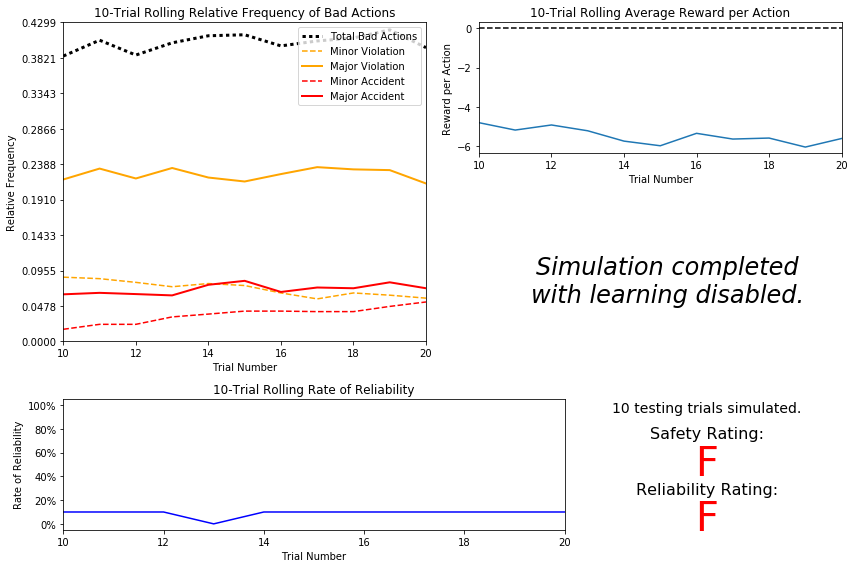

In [7]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

From the graph "10-Trial Rolling Relative Frequency of Bad Actions", the driving agent makes bad decisions 38.21-42.99% of the time. Major violations are the second largest type of bad actions with a frequency of 21.5-23.88%.  Major accidents and minor violations come about tied at a distant third place with 4.78-9.55% occurrences. Minor accidents happen 1.2-4.78% of the time.  For a vehicle that drives randomly learning the rules of traffic as it goes, one would expect Total Bad Actions, accidents and violations to be much higher.  However, they altogether are below 43% with major violations (running a red light) larger than the other three combined.  Interestingly, major and minor accidents are quite low at below 10 and 5% respectively.  The relatively low traffic infractions could be due to the fact that all dummy agents drive obeying traffic laws and the way the simulation is set up so that there is constant motion of cars and reasonable distance between them.  

Looking at the "10-Trial Rolling Rate of Reliability" graph, the rate of reliability is 0-10% or 1 success for every 10 trials. This low percentage makes sense as the agent does not have a final destination to aim for rather it's just driving around thoughtlessly and arriving at the destination by chance. The Smartcab starts each trial at different location in the grid, drives around, disappears out of the screen, comes back in at another side, and keeps driving.  This random wandering in a small grid allows it to hit a 10% success rate but does not allow it to reach its destination 60% or more of the time necessary for an 'F' rating.

The "10-Trial Rolling Average Reward per Action" shows that the agent receives an average reward between -5.25 and -6 for making bad actions 38-43% of the time. The other 57-62% of the time it doesn't incur in violations or accidents for which it receives positive rewards that makes its average reward not as heavily penalized as expected.

After running 100 testing trials (see below graph), the outcome of results doesn’t change significantly. Bad decisions happen 39.29-44.2% versus before at 38.21-42.99%. Major violations happen 22-24.56% versus before at 21.5-23.88%.  Minor violations happen 8-9.82% versus previously at 4.78-9.55%.  Major accidents happen 4-7% versus previously at 4.78-9.55%. Minor accidents happen 2-3% versus previously at 1.2-4.78%.  The average reward per action is -4.75 to -5 versus previously at -5.25 and -6. The rate of reliability remains in the range of 0-10% but 6 trials are at 0%. Both ratings for safety and reliability remain at an "F" score. The small fluctuations in the indicators are due to the randomness of the variables in the simulation and over many more trials they should remain within an expected range of similar values. 

In summary, all plots don't show a clear trend either upward or downward.  Over many trials and at any trial or step the patterns that appear are random fluctuations due to the random behaviors of both the non-learning agent and the environment.

This Smartcab can’t be considered safe and reliable for its passengers. Since it doesn’t know about traffic laws or right-of-way rules, it commits many major and minor accidents and traffic violations making it a hazard to passengers up to 43% of the time.  Driving randomly does not help in getting passengers to their destination at least 60% of the time. The "F" scores given for both safety and reliability summarize these results.  In real life it’s common to find people-driven cabs to achieve A+ for safety and C to A+ for reliability, depending on the population center.  For the self-driving cabs of the future, they need to attain at least these minimum grades and preferably higher to win the continued trust of passengers.  


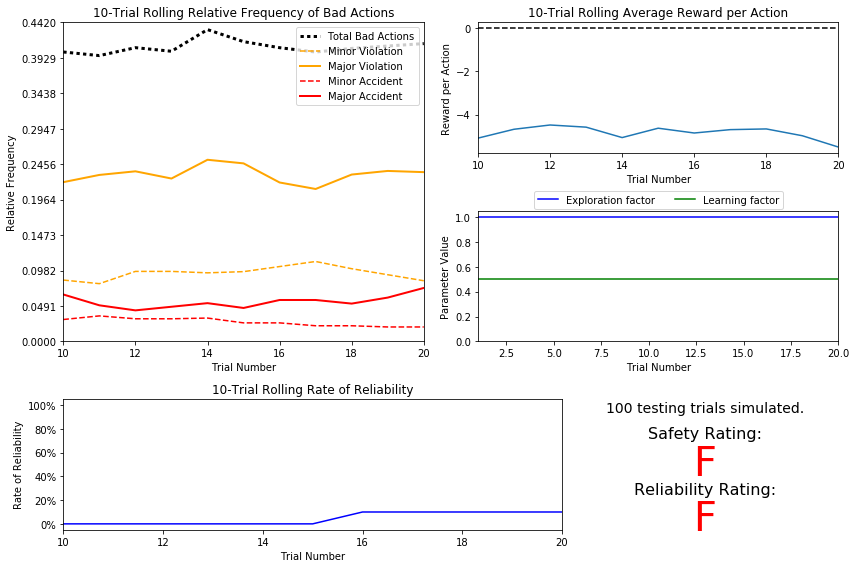

In [2]:
# Load the 'sim_no-learning' log file with 100 trial trips
vs.plot_trials('sim_no-learning-100Trials.csv')

## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

There are four features available to the agent for learning safety and two features for learning efficiency. Safety's features are light, left, right, and oncoming.  Efficiency's features are waypoint and deadline. The criteria to select which features to keep will have to do with choosing the least number of features that can achieve the same results in safety and efficiency.  This will reduce the complexity of the state space (curse of dimensionality) and thus the number of exploratory trials.  

Safety is about not committing traffic violations or accidents. Keeping in mind that:
* A minor violation is not moving when the light turns green and there is no oncoming traffic (forward or right)
* A major violation is either moving forward or left on a red light with no oncoming or cross traffic.  
* A minor accident is (1) moving left when the light turns green and there is oncoming traffic (forward or right), and (2) moving right on a red light when there is left traffic going forward
* A major accident is (1) moving forward on a red light with cross traffic, (2) moving to the left with cross traffic, (3) moving to the left with oncoming traffic to the right

There are two scenarios to consider in analyzing which features to keep: (a) the Smartcab is at a red light, (b) the Smartcab is at a green light and about to cross the intersection.  
* When the Smarcab is at a red light, it can either be idle or turn right.  If it doesn't move, none of the safety features matter. If it decides to turn right, it only needs to know if there is an oncoming car coming from the left through the intersection.  It doesn't matter the 'oncoming' car's intention since it's at a red light and we know it obeys traffic laws.  The Right-Hand-Side (RHS) car is at a green light so it can be idle, move forward, go to the right or to the left. None of the four actions interfere with the self-driving agent's turning to the right.  Thus, the only relevant features are inputs['light', 'left']
* When the Smartcab is at a green light and about to cross the intersection, it can move forward, turn left, turn right, or be idle.
    + If it moves forward, it has the right of way and any oncoming car that wants to turn left or any RHS car that wants to turn right will have to wait until it passes the intersection. The oncoming car that wants to move forward has no bearing on the Smartcab.  The RHS car at the red light can choose to be idle or, as discussed, turn right which it won't do. The LHS car also at a red light can choose to be idle or turn right, neither action are of a concern. Since the self-driving agent has the right of way moving forward, it can proceed without regard to any of the features.
    + If it turns to the left, it needs to know if any oncoming car will go forward or turn right. If the oncoming car turns to the left, it won't conflict with the Smartcab. The LHS car at a red light can be idle or turn to its right which poses no risk. The RHS car at a red light can be idle or turn to its right and also poses no risk. In conclusion, only inputs['oncoming'] is relevant.
    + If it turns to the right, it has the right of way and can do so without knowing what the oncoming car will do. The oncoming car will need to wait until the Smartcab finishes turning right before it can turn left. If the oncoming car moves forward, it has no bearing on the Smartcab.  At a red light, the RHS car can be idle or turn right which won't be of a concern. The LHS car at a red light can be idle or turn right which won't affect it either. Thus, no inputs are relevant.
    + If it decides to be idle, most likely it's waiting to turn left which is already discussed. If it's idle with no intention of moving, no inputs are important to know. 
    
In summary, the features most relevant for learning safety are inputs['light', 'left', 'oncoming'].

Efficiency refers to the consistency of the Smartcab in reaching its destination on time.  The feature 'waypoint' indicates to the Smartcab which direction to follow to get to its destination while 'deadline' lets it know how much time it has left. This last feature, 'deadline', could help the Smartcab decide between alternative actions to get quicker to its destination.  However, the downside is that it can encourage the agent to break traffic laws in its attempt to make it before time expires.
Additionally, the values it can assume (20, 25, 30, 35) adds up to 35 combinations to every state which expands the state space too largely for extra little benefit. Using only 'waypoint' as an efficiency feature could make getting to the destination a little longer but the many fewer exploration trials and the added safety for not having 'deadline' can more than compensate for that.  

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The size of the state space is given by the features and the valid states they can occupy:
    - waypoint (forward, left, right) : 3
    - light (T, F) : 2
    - left (None, forward, left, right) : 4
    - oncoming (None, forward, left, right) : 4

For waypoint, 'None' is not used since it'd mean that the agent is already at the destination and the simulation has ended. The state space is the combination of all the possible valid states of the features: (3 x 2 x 4 x 4) = 96 total states

Knowing that the Smartcab has four actions (None, forward, left, right) available, the state-action pairs that it would need to go through are (96 x 4) = 384. To learn a policy for each state, the Smartcab would need to explore close to or at least these many times.  The way the simulation operates which assigns random headings, destinations, intersections, etc. to the Smartcab and dummy agents it may take longer than doing a hard-code to go through the 384 state-action pairs sequentially and non-randomly.

To have a rough approximation of how the simulation would behave, let's say that the self-driving agent should visit each state-action pair between 50-100 times.  We have a lower limit of 19,200 (384 x 50) and an upper limit of 38,400 (384 x 100). Knowing that the simulation uses 20-35 time steps per training trial, the estimated range of the number of trials is 548 (19,200/35) to 1,920 (38,400/20). Still, there could be unexplored or unvisited state-action pairs producing only local optimum states. With an approximate range of trials between 548 to 1,920, it's a a reasonable number of trials to learn a feasible policy for a 384 size state space which can take 2-6 minutes approximately in processing time. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

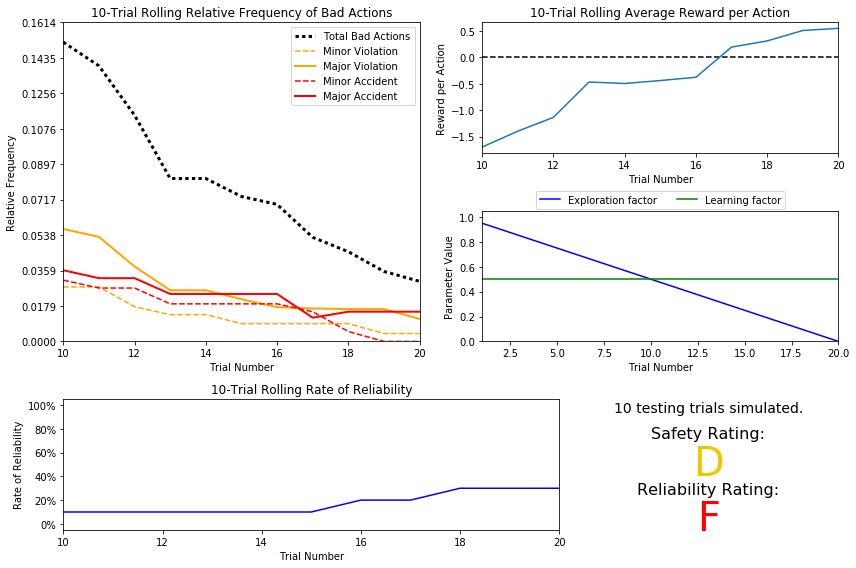

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Comparing all three graphs and final ratings:
* The order of magnitude of the violation and accident curves remain about the same (high to low): major violation, major accident, minor violation, minor accident.
* All violations and accidents show steep declines and downward trends: Total Bad Actions (38.21-42.99% before vs. 15.25-3.59% now), major violations (21.5-23.88% vs. 6-1%), major accidents (4.78-9.55% vs. 3.59-1.79%), minor accidents (1.2-4.78% vs. 3.5-0%), minor violations (4.78-9.55% vs. 2.7-0%). Major violation and minor accident show the steepest downward slopes.  The difference between major violations and the rest are not as big as before. They all converge to a narrow range (1.79-0%). At the end of 20 training trials, the improvement in safety has been dramatic in the order of five to ten times decrease.  
* The average reward per action shows a significant upward trend (-5.25 to -6) vs. (-1.75 to +0.5)
* The rate of reliability's slope is slightly more positive than before (0-10% vs. 10-30%)

The driving agent required 20 training trials before testing. This number is in line with the epsilon-tolerance of 0.05. Starting at an initial epsilon of 1.0, the decay function decreased by 0.05 at each trial until it just fell below the tolerance of 0.05. At this rate, there were 20 (= 1.0/0.05) training trials possible before it started testing.  

The epsilon exploration factor is accurately represented in the parameters panel as evidenced by the downward sloping blue line that starts at 0.95 and finishes at 0, decreasing at each trial by 0.05. This can be further confirmed by looking at the 'sim_default-learning' spreadsheet at the 'e' factor in the 'parameters' column where it shows that epsilon decreases from 0.95 to 0 over the range of training trials 1-20.

As the number of training trials increased, the number of bad actions also decreased as shown by the downward sloping dotted black line in the "10-Trial Rolling Relative Frequency of Bad Actions" graph. Total Bad Actions started at trial 10 with nearly 15.25% of bad actions and ended up at trial 20 with 3.59%, a decrease of 76.5%. The average reward increased from -1.75 at trial 10 to +0.5 at trial 20, a 128.6% improvement.

Compared to the initial driving agent, the rating for safety improved from 'F' to 'D' but reliability stayed the same at 'F'. The improvement in safety is due to the reduction in all accidents and violations. The 'D' grade reflects at least a minor accident during testing trials. The 'F' reliability shows that still the agent fails to reach the destination on time for at least 60% of trips.

Setting the driving agent to learn has produced, in only 20 training trials, an important decrease in bad actions, a steep upward trend in average reward per action and a modest increase in safety. The rate of reliability did not improve enough to make a difference in the rating score. Twenty trials produced one rating to become better but not both.  We can expect that as the number of training trials increases the frequency of violations and accidents would decrease significantly as well.  

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

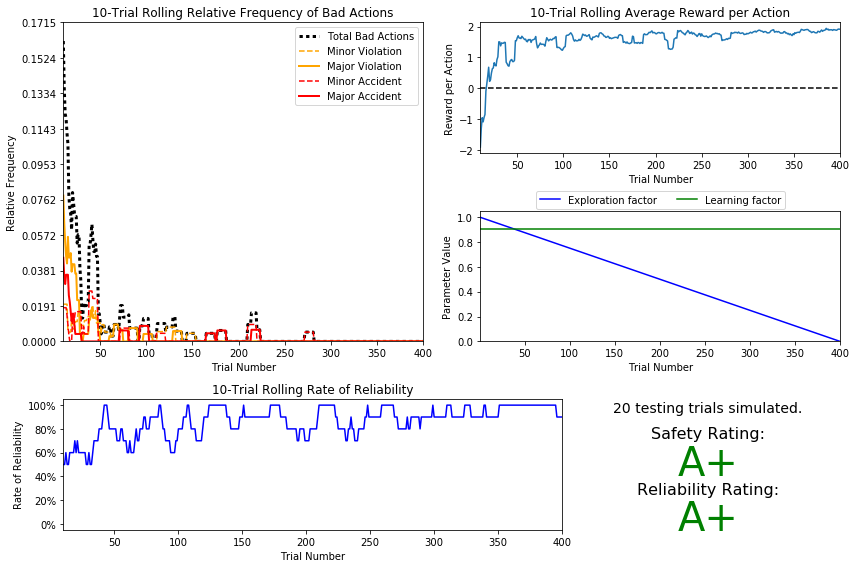

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

The decaying function used was {epsilon = epsilon - 0.0025}. Of all suggested formulas, a lineal function was more appropriate for this problem since it decayed to 'tolerance' at a reasonable, steady rate. For the size of the state space, the Smartcab needed a longer curve that could allow it time to explore and define enough state-action pairs. To arrive at the 0.0025 value, the function's constant was decreased from 0.05 by 0.01, then by 0.001 until there was convergence to A+ for both ratings. The initial epsilon used was 1.0 to let it have the longest learning time. 

It took 400 training trials for the Smartcab to learn enough policies before testing began. This number can be verified in the sim_improved-learning.csv file, in the last entry of 'False' under the 'testing' column and looking up the value in the column 'trial'.

The epsilon-tolerance used was 0.00125 which is half of the epsilon constant 0.0025. At this value, it prevented any infinite loop and stopped the iteration once epsilon decreased just past 0.0025. 

The 'alpha' used was 0.9. This value was arrived by starting 'alpha' at 0.5 and increasing it by 0.1 while holding constant everything else. This was done at several epsilon values but specially at 0.0025. The few initial runs showed that increasing alpha made the agent learn quickly from the rewards resulting in drastic reductions in bad actions, accidents and violations. Reliability improved much as well. The next step was to find the minimum number of training trials and the lowest value of alpha that could accomplish an A+ for both ratings over repeated testing trial runs. alpha went as high as 1.0 but after fiddling with several values, 0.9 was the value that allowed the balance described.

This improved learner is much better than the default Q-learner as evidenced by the jump in safety and reliability performance from (D, F) to (A+, A+). The default learner had improvements in all indicators but most bad actions did not get to zero, its reliability was at best 30% and rewards per action were at most 0.5.  For the improved learner on the other hand, the frequency of bad actions, accidents and violations decreased to zero after trial 273. The net reward started being positive consistently after trial 21 and average reward per action leveled off around trial 50 averaging approximately +1.5. The rate of reliability showed less volatility after about trial 275, averaging around 90%. It's a substantial jump in improvement in all respects. 

The improved Q-Learner's A+ results in safety and reliability show that the driving agent learned enough to achieve those ratings and, as such, an appropriate policy. Looking at the Q-table values at sim_improved-learning.txt, there are many unexplored state-action pairs with 0.0 values, and many other states that have the second best action rather than the optimal policy. In spite of them, the A+ results show that the mix of optimal and suboptimal policies per state are "appropriate" enough to drive the Smartcab's performance to its desired goals and thus make up for an appropriate policy. 

I am satisfied with the A+ grade in both safety and reliability ratings of the Smartcab. The simulation was done with 20 testing trials rather than the suggested 10 and over repeated runs that gave consistent results, offering confidence on the ratings obtained. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

An optimal policy for a self-driving agent is acting on an action that does not incur in any violations or accidents and follows the waypoint directly to its destination while considering the limitations imposed by the features (light, movement of dummy agents) of the state it occupies.  

In the below four examples, we'll discuss the optimal policy for each state:

a. ('left', 'green', None, 'right') : {forward : 0.00, right : 0.00, None : 0.00, left : 1.28}

For this state, the waypoint is 'left', light is 'green', oncoming is None, and left is 'right'. The light is green and the agent is supposed to turn left. There is no oncoming car and the LHS car is turning right posing no danger to the agent.  The optimal action is to turn left in the direction of the waypoint.  The highest Q-value is 1.28 indicating that it should go left which is the correct policy for the given state and the same as the optimal policy. It's the correct policy since it directs the agent to follow the waypoint as the quickest move to the destination while being safe at the same time. 

b. ('forward', 'red', 'left', 'right') : {forward : 0.00, right : 0.65, None : 0.00, left : -9.43}

The agent is at a red light and it's supposed to move forward.  The oncoming car is also at a red light and supposed to turn left but it won't move because of the red light.  The car approaching from the left will turn right which won't affect the Smartcab. At a red light, the Smartcab has two choices: stay put or turn right. Its waypoint is forward which means it's best that it sits in wait for the changing traffic light.  Thus, 'None' is the optimal policy. However, the highest Q value is 0.65 to turn right which is the incorrect policy for the state and different from the optimal policy. This action is still safe but delays the agent in reaching its destination. If it were to wait at the red light, it'd get to the destination quicker and be safe at the same time.

c. ('right', 'red', 'left', None) : {forward : -36.66, right : 0.00, None : 1.28, left : -9.58}

The agent is at a red light and supposed to turn right.  The oncoming car is at a red light and supposed to turn left but since it's at a red light it won't move.  There is no LHS car. Since there are no approaching cars in any direction, the Smartcab can turn right safely. This should be the optimal policy for this state.  However, the current policy (None : 1.28) says that is should be idle which is incorrect and different from the optimal policy. It's the second best option but inefficient in reaching the destination if the deadline is tight. If it were to turn right, it will get quicker to its destination and still be safe.  Having achieved A+ for both ratings, it suggests that the "Deadline" in the simulation allows some leeway to make a few mistakes as long as they are not too many.

d. ('right', 'green', 'forward', 'right') : {forward : 0.00, right : 1.20, None : 0.00, left : -18.39}

The agent is at a green light and supposed to turn right. The oncoming car will move forward. The LHS car will turn right posing no danger to the agent. The Smartcab can turn right safely and this should be the optimal policy.  The highest Q-value is 1.20 for turning right which is the correct policy and the same as the optimal policy. It's the correct policy since it directs the agent to follow the waypoint as the quickest action to the destination while being safe at the same time.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Future rewards won't work for this project because it's not possible to predict future states.  The agent can only see its immediate intersection not the full environment. The information beyond the current state is not available due to the randomness of the environment. Not being able to see the states all the way to the destination won't permit it to plan a route or allow any back propagation of rewards.  

An environment as random as this one does not allow the agent to use information from previous trials to predict future states. Every new trial is only good for the lessons learned at the intersections, not for the entire trajectory however successful it was in reaching the destination.  The randomness of the environment makes every trial unique and not useful for modeling. The Smartcab cannot learn a route by back propagation of future rewards from previous trials.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.